In [107]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import datetime
import cartopy.crs as ccrs
import cartopy

In [96]:
d = Dataset('/home/robbie/Dropbox/had4_krig_v2_0_0.nc')

dt0 = datetime.date(1850,1,1)

dts = [datetime.timedelta(days=int(d)) + dt0 for d in d['time']]

d

/tmp/ipykernel_19408/1052998006.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dts = [datetime.timedelta(days=int(d)) + dt0 for d in d['time']]


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: had4_krig_v2_0_0
    institution: University of York, University of Ottawa.
    history: Updated 2021-08-18
    reference: Cowtan, K., & Way, R. G. (2014). Coverage bias in the HadCRUT4 temperature series and its impact on recent temperature trends. Quarterly Journal of the Royal Meteorological Society.
    dimensions(sizes): latitude(36), longitude(72), time(2058)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), int32 year(time), int32 month(time), float32 temperature_anomaly(time,latitude,longitude)
    groups: 

In [115]:
latgrid = np.repeat(np.array(d['latitude'])[:,np.newaxis],72,axis=1)
longrid = np.repeat(np.array(d['longitude'])[:,np.newaxis],36,axis=1).T

time_tile_lat = np.repeat(latgrid[np.newaxis,:],len(dts),axis=0)

time_tile_lat.shape

weights.shape

ta = np.array(d['temperature_anomaly'])

weights = np.cos(np.deg2rad(time_tile_lat))

ta_arctic = ta[:,latgrid>=66]
ta_tropic = ta[:,latgrid<66]

w_arctic = weights[:,latgrid>=66]
w_tropic = weights[:,latgrid<66]

plt.figure(figsize=(5,10))

plt.plot(dts,np.average(ta_arctic,weights=w_arctic,axis=(1)),label='Arctic')

plt.plot(dts,np.average(ta_tropic,weights=w_tropic,axis=(1)),label='Everywhere\nElse')

plt.ylabel('Temperature Anomaly (K)',fontsize='x-large')

plt.xlabel('Year',fontsize='x-large')

plt.legend(fontsize='x-large')

/tmp/ipykernel_19408/2170640947.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  latgrid = np.repeat(np.array(d['latitude'])[:,np.newaxis],72,axis=1)
/tmp/ipykernel_19408/2170640947.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  longrid = np.repeat(np.array(d['longitude'])[:,np.newaxis],36,axis=1).T


(2058, 36, 72)

In [130]:

arctic_ave = np.average(ta_arctic,weights=w_arctic,axis=(1))

sub_arctic_ave = np.average(ta_tropic,weights=w_tropic,axis=(1))


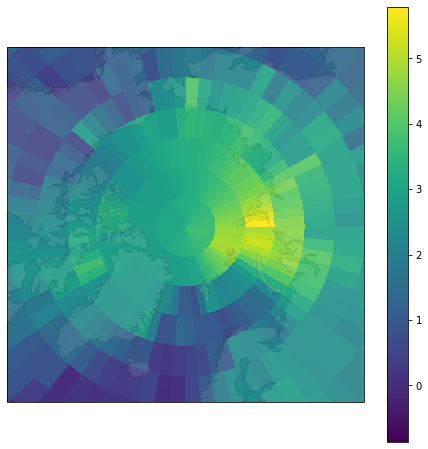

In [127]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=10,alpha=0.1)

ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

pm = ax.pcolormesh(longrid, latgrid, np.nanmean(ta[-20:],axis=0),
             transform=ccrs.PlateCarree())

fig.colorbar(pm)

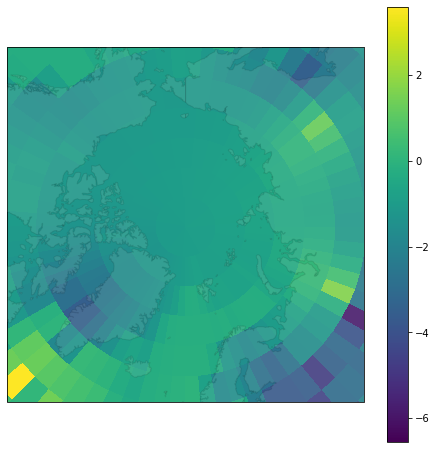

In [129]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=10,alpha=0.1)

ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

pm = ax.pcolormesh(longrid, latgrid, np.nanmean(ta[0:2],axis=0),
             transform=ccrs.PlateCarree())

fig.colorbar(pm)

# 

In [135]:
d = Dataset('/home/robbie/Dropbox/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: 2m air temperature over land blended with sea water temperature at a depth of 20cm expressed as monthly anomalies relative to 1961-1990 climatology.
    history: Data set built at: 2022-10-20T13:33:18+00:00
    institution: Met Office Hadley Centre / Climatic Research Unit, University of East Anglia
    licence: HadCRUT5 is licensed under the Open Government Licence v3.0 except where otherwise stated. To view this licence, visit https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3
    reference: C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. Hogan, R. E. Killick, R. J. H. Dunn, T. J. Osborn, P. D. Jones and I. R. Simpson (2021), An updated assessment of near-surface temperature change from 1850: the HadCRUT5 data set, Journal of Geophysical Research: Atmospheres, 126, e2019JD032361. https://doi.org/10.1029/2019JD032361
    source: CRUTEM.5.0.1.0 HadSST.4.0.

In [136]:
dt0 = datetime.date(1850,1,1)

dts = [datetime.timedelta(days=int(d)) + dt0 for d in d['time']]

d

/tmp/ipykernel_19408/2829308393.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dts = [datetime.timedelta(days=int(d)) + dt0 for d in d['time']]


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    comment: 2m air temperature over land blended with sea water temperature at a depth of 20cm expressed as monthly anomalies relative to 1961-1990 climatology.
    history: Data set built at: 2022-10-20T13:33:18+00:00
    institution: Met Office Hadley Centre / Climatic Research Unit, University of East Anglia
    licence: HadCRUT5 is licensed under the Open Government Licence v3.0 except where otherwise stated. To view this licence, visit https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3
    reference: C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. Hogan, R. E. Killick, R. J. H. Dunn, T. J. Osborn, P. D. Jones and I. R. Simpson (2021), An updated assessment of near-surface temperature change from 1850: the HadCRUT5 data set, Journal of Geophysical Research: Atmospheres, 126, e2019JD032361. https://doi.org/10.1029/2019JD032361
    source: CRUTEM.5.0.1.0 HadSST.4.0.

/tmp/ipykernel_19408/1381057200.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  latgrid = np.repeat(np.array(d['latitude'])[:,np.newaxis],72,axis=1)
/tmp/ipykernel_19408/1381057200.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  longrid = np.repeat(np.array(d['longitude'])[:,np.newaxis],36,axis=1).T
/tmp/ipykernel_19408/1381057200.py:10: De

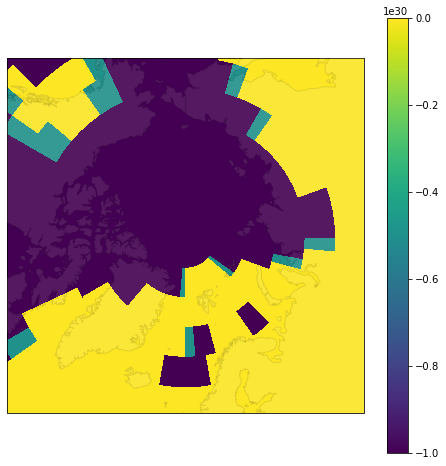

In [140]:
latgrid = np.repeat(np.array(d['latitude'])[:,np.newaxis],72,axis=1)
longrid = np.repeat(np.array(d['longitude'])[:,np.newaxis],36,axis=1).T

time_tile_lat = np.repeat(latgrid[np.newaxis,:],len(dts),axis=0)

time_tile_lat.shape

weights.shape

ta = np.array(d['tas_mean'])[:,:,:]

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=10,alpha=0.1)

ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

pm = ax.pcolormesh(longrid, latgrid, np.nanmean(ta[0:2],axis=0),
             transform=ccrs.PlateCarree())

fig.colorbar(pm)

/tmp/ipykernel_19408/3225899085.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  latgrid = np.repeat(np.array(d['latitude'])[:,np.newaxis],72,axis=1)
/tmp/ipykernel_19408/3225899085.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  longrid = np.repeat(np.array(d['longitude'])[:,np.newaxis],36,axis=1).T
/tmp/ipykernel_19408/3225899085.py:10: De

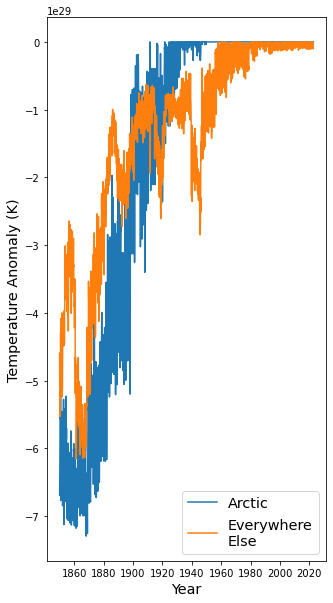

In [139]:
weights = np.cos(np.deg2rad(time_tile_lat))

ta_arctic = ta[:,latgrid>=66]
ta_tropic = ta[:,latgrid<66]

w_arctic = weights[:,latgrid>=66]
w_tropic = weights[:,latgrid<66]

plt.figure(figsize=(5,10))

plt.plot(dts,np.average(ta_arctic,weights=w_arctic,axis=(1)),label='Arctic')

plt.plot(dts,np.average(ta_tropic,weights=w_tropic,axis=(1)),label='Everywhere\nElse')

plt.ylabel('Temperature Anomaly (K)',fontsize='x-large')

plt.xlabel('Year',fontsize='x-large')

plt.legend(fontsize='x-large')